<a href="https://colab.research.google.com/github/Masadn/Data-Science/blob/main/Data_Science_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

#Simple Linear Regression
We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [4]:
# Read Data From the give dataset
url= "drive/My Drive/Python For Data Science /dataset/student_scores.csv"
data=pd.read_csv(url)
print("Data Load Successfully!")
data.head()


Data Load Successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.shape

(25, 2)

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2: Visualising the Data

Let's plot our data on a graph to look closely at the dataset given try to find the relationshio between the data 

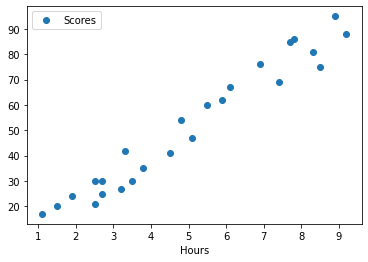

In [9]:
#plot of Scores Distribution
data.plot(x='Hours', y='Scores', style='o')
plt.show() 

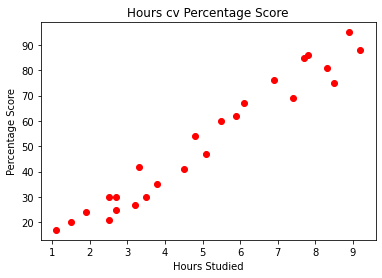

In [10]:
Hours=data[['Hours']]
Scores=data['Scores']
plt.scatter(Hours,Scores,c='red')
plt.title("Hours cv Percentage Score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

Inference: From the above graph, we can infer that there is apostive linear relation between the number of study and Percentage Score

# Step 3: Data Perprocessing 
in first assign the feature variable, Hours, in this case, to the variable  X and the responce variable, Score, to the variable y. the next step is to divide the data into "attributes (input) and "labes"(outputs).

In [12]:
Hours=data[['Hours']]
Scores=data['Scores']

In [13]:
#X_train, X_test , Y_train, y_test =train_test_split(Hours,Scores,test_size=0.2,random_state=0)
X_train, X_test , Y_train, y_test =train_test_split(Hours,Scores,test_size=0.2,random_state=0)

regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(regressor.intercept_)

2.018160041434662


In [15]:
print(regressor.coef_)

[9.91065648]


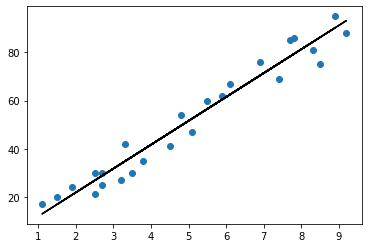

In [16]:
line=regressor.coef_ *Hours+regressor.intercept_
plt.scatter(Hours,Scores)
plt.plot(x,line,color='black')
plt.show()

In [17]:
print(X_test)
y_pred =regressor.predict(X_test)
y_pred

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [19]:
df=pd.DataFrame({"Actual" :y_test,"Predicted":y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [20]:

print("Training Score: " , regressor.score(X_train,Y_train))
print("Test Score : " , regressor.score(X_test,y_test))

Training Score:  0.9515510725211553
Test Score :  0.9454906892105354


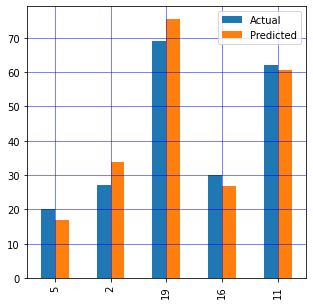

In [22]:
df.plot(kind='bar', figsize=(5,5))
plt.grid(linewidth = '0.5',color='blue')
#plt.grid(linewidth ='0.5',)


In [23]:
HoursValue =10.25
test=np.array([HoursValue]).reshape(-1,1)
test

array([[10.25]])

In [24]:
prediction = regressor.predict(test)
prediction
print("Number Of Houres = {}".format(HoursValue))
print("Number Of Score = {}".format(prediction[0]))

Number Of Houres = 10.25
Number Of Score = 103.60238896801764


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
R2 Score: 0.9454906892105354


# Multiple Linear Regression
In the previous section we performed linear regression involving two variables. Almost all real world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called "multiple linear regression". The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In this section we will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.

In [26]:
 # Read Data From the give dataset
url= "drive/My Drive/Python For Data Science /dataset/petrol_consumption.csv"
data=pd.read_csv(url)
print("Data Load Successfully!")
data
url1='drive/MyDrive/Python For Data Science /dataset/testData.csv'
data1=pd.read_csv(url1)

Data Load Successfully!


In [27]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Preparing the Data

In [28]:
X = data[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

# Split Data into Test and Train

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Making Predictions

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
X_test

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
29,9.0,3601,4650,0.493
4,8.0,4399,431,0.544
26,8.0,3448,5399,0.548
30,7.0,3640,6905,0.518
32,8.0,3063,6524,0.578
37,7.0,3897,6385,0.586
34,8.0,3528,3495,0.487
40,7.0,4449,4639,0.626
7,8.0,5126,2138,0.553
10,8.0,4391,5939,0.530


In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [38]:
url1='drive/My Drive/Python For Data Science /dataset/testData.csv'
data1=pd.read_csv(url1)
y_pred = regressor.predict(data1)

In [39]:
y_pred

array([526.97067878, 559.39997146, 583.39065738, 505.61428732,
       545.64546431, 435.88213397, 306.45286058, 502.07478157,
       483.75970694, 550.71922386])

In [40]:
data1['Predicted']=y_pred

In [41]:
data1

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Predicted
0,9.0,3571,1976,0.525,526.970679
1,9.0,4092,1250,0.572,559.399971
2,9.0,3865,1586,0.580,583.390657
3,7.5,4870,2351,0.529,505.614287
4,8.0,4399,431,0.544,545.645464
5,10.0,5342,1333,0.571,435.882134
6,8.0,5319,11868,0.451,306.452861
7,8.0,5126,2138,0.553,502.074782
8,8.0,4447,8577,0.529,483.759707
9,7.0,4512,8507,0.552,550.719224


# Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE. 

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 83.9190905382702
Mean Squared Error: 14050.400564929427
Root Mean Squared Error: 118.53438558042737
